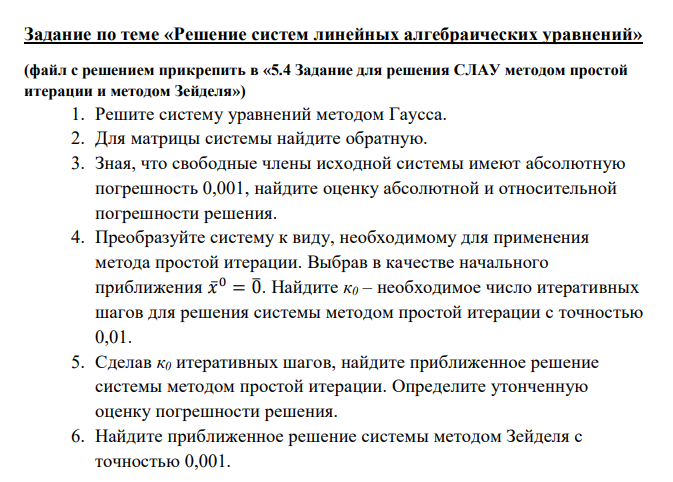
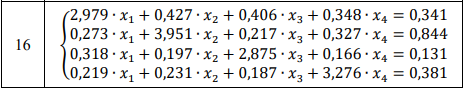

Приведем систему A к виду, где диагональные элементы имеют коэффициент 1:

In [16]:
def div_main_diag(row, ind):
    return [(row[i] / row[ind]) for i in range(len(row))]

def gen_matrix_remaining_X(row):
    new_matrix = []
    
    for i in range(len(row) - 1):
        if row[i] == 1.0:
            new_matrix.append(0)
        else:
            new_matrix.append(row[i] * (-1))
    return new_matrix
    

# Главная матрица
A = [
    [2.979, 0.427, 0.406, 0.348, 0.341],
    [0.273, 3.951, 0.217, 0.327, 0.844],
    [0.318, 0.197, 2.875, 0.166, 0.131],
    [0.219, 0.231, 0.187, 3.276, 0.381],
]

diag_A = []
ind = 0

# Делим строку на коэффициент перед x, где порядковый номер равен номеру строки
for row in A:
    diag_A.append(div_main_diag(row, ind))
    ind += 1

# Вводим необходимые матрицы
X = [1.0, 1.0, 1.0, 1.0]
C = [row[-1] for row in diag_A]
B = [gen_matrix_remaining_X(row) for row in diag_A]

Найдем норму матрицы B и проверяем условие сходимости:

In [18]:
norma_B = max([abs(sum(row)) for row in B])

if norma_B < 1:
    print('Условие сходимости выполняется!')
else:
    print('Условие сходимости НЕ выполняется!')

Условие сходимости выполняется!


Теперь найдем приближенное решение с помощью метода Зейделя:

In [24]:
def method_zendail(B, C, x0, eps=1e-3, max_iter=10000):
    n = len(C) # Размер системы
    x = x0[:] # Копия начального вектора
    for k in range(1, max_iter+1):
        x_old = x[:]
        for i in range(n):
            s = 0.0
            # сумма по j<i (берём уже обновлённые значения итерации k)
            for j in range(i):
                s += B[i][j] * x[j]
            # сумма по j>i (берём значения из предыдущей итерации)
            for j in range(i+1, n):
                s += B[i][j] * x_old[j]
            x[i] = C[i] + s # Сама формула метода

        # критерий остановки по ||x^{k} - x^{k-1}||_inf
        diff = max(abs(x[i]-x_old[i]) for i in range(n))
        if diff <= eps:
            return x, k
    return x, max_iter

sol, iters = method_zendail(B, C, X)
print(f'Итераций: {iters}')
print('Ответ:', [round(v, 6) for v in sol])

Итераций: 4
Ответ: [0.072094, 0.199663, 0.01835, 0.096355]
